In [5]:
# Load pickle file with syllable data and run UMAP on it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

In [6]:
# load pickle file
fs = 44100

syllables = pd.read_pickle('syllables.pkl')
syllables.head()

,start,end,audio,sonogram,spectral_derivative
0,1.418027,1.489116,"[-714, -742, -718, -702, -686, -682, -661, -66...","[[423641452.5512427, 302242973.2266859, 193954...","[[-0.00014106349610150536, -0.0012029245732037..."
1,1.941837,2.012925,"[-1019, -985, -987, -967, -935, -905, -901, -8...","[[537691182.1141583, 419277547.2556464, 445570...","[[0.0005482373269966149, 0.0071859802778671015..."
2,2.072789,2.192517,"[-451, -505, -489, -493, -560, -606, -652, -70...","[[1530968335.4681425, 1564288654.7873232, 1528...","[[0.021666905483439088, 0.02298290812265025, 0..."
3,2.218707,2.424490,"[-1615, -1805, -1930, -2076, -2090, -2398, -24...","[[574061913.8935981, 422403563.7620248, 276044...","[[-0.0024366184886312936, -0.00502274333171885..."
4,2.529252,2.652721,"[1958, 1969, 2001, 2000, 1971, 1979, 1975, 195...","[[979990962.2180833, 1136811010.452191, 122036...","[[0.020516063170273942, 0.015092639286743653, ..."


In [8]:
from sklearn.cluster import HDBSCAN

data = np.array(syllables['sonogram'].tolist())
reducer = umap.UMAP(n_neighbors=100, n_jobs=-1)
embedding = reducer.fit_transform(data.reshape(data.shape[0], -1))
hdbscan = HDBSCAN(min_cluster_size=20).fit_predict(embedding)


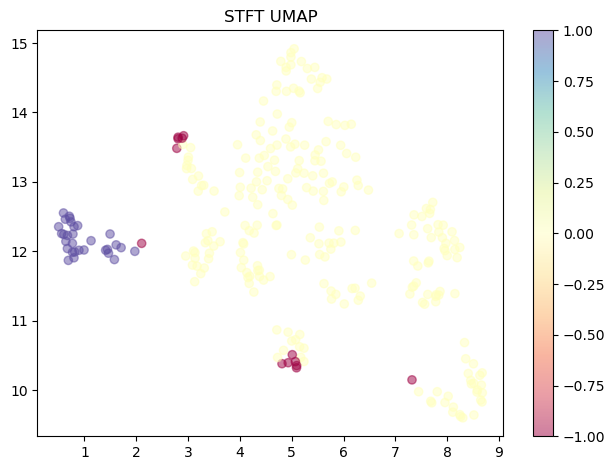

In [13]:
# Use embedding to cluster the notes
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan, cmap='Spectral', alpha=0.5)
plt.title('STFT UMAP')
plt.colorbar()

plt.tight_layout()

Text(0.5, 1.0, 'STFT TSNE Embedding')

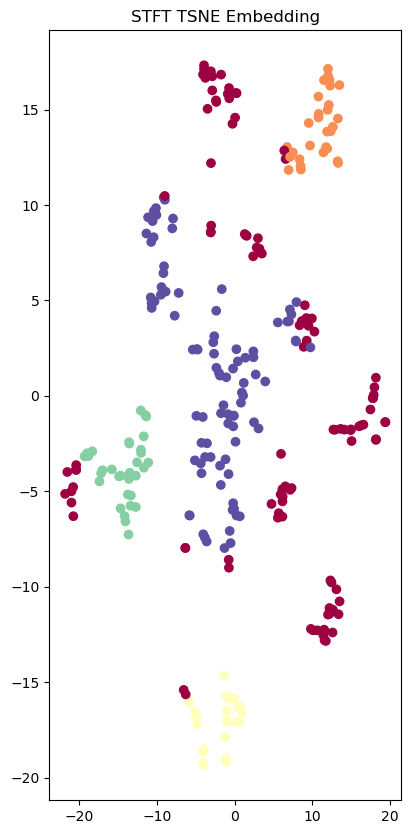

In [20]:
from sklearn.manifold import TSNE

data = np.array(syllables['sonogram'].tolist())
reducer = TSNE(n_components=2, verbose=0, perplexity=10, n_iter=300)
embedding = reducer.fit_transform(data.reshape(data.shape[0], -1))
hdbscan = HDBSCAN(min_cluster_size=20).fit(embedding)

# Plot the TSNE embedding
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan.labels_, cmap='Spectral')
plt.title('STFT TSNE Embedding')